In [377]:
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, precision_recall_curve, log_loss
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from scipy import stats
import xgboost as xgb
import lightgbm as lgb
pd.set_option('display.max_columns', None)

In [2]:
def show_bar_chart(values: list, bins: int) -> None:
    # Create bins and count occurrences
    counts, bin_edges = np.histogram(values, bins=bins)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', align='edge', color='skyblue')
    
    # Add title and labels
    plt.title('Bar Chart')
    plt.xlabel('Value Range')
    plt.ylabel('Count')
    
    # Show the chart
    plt.show()

In [3]:
#Reading data
data = pd.read_csv("../gross prediction/data_with_is_series.csv", index_col=0)
data = data.drop(index=data.loc[data['is_series']].index)
data

,movie_title,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,color,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title,is_series
0,Avatar,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Color,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,False
1,Pirates of the Caribbean: At World's End,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Color,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0,False
2,Spectre,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Color,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,1,0,False
3,The Dark Knight Rises,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,Color,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,3,0,False
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,NaN,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,9,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,Newlyweds,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Color,1338,690,Daniella Pineda,1,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,NaN,2,0,False
5045,Signed Sealed Delivered,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Color,629,2283,Crystal Lowe,2,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,NaN,2,0,False
5047,A Plague So Pleasant,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,Color,38,0,David Chandler,0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,NaN,4,0,False
5048,Shanghai Calling,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Color,1255,2386,Eliza Coupe,5,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,NaN,3,0,False


In [4]:
data.columns

Index(['movie_title', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'color',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'Unnamed: 28', 'war_symb_title',
       'point_symb_title', 'is_series'],
      dtype='object')

In [5]:
rows_to_delete = []

# Data analyze and cleaning

## Duplicates

In [8]:
data = data.drop_duplicates()

In [9]:
pd.set_option('display.max_rows', None)
t = data['movie_imdb_link'].value_counts()
print(t.loc[t > 1])
pd.set_option('display.max_rows', False)

movie_imdb_link
http://www.imdb.com/title/tt0360717/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt2638144/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt2224026/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0088993/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt1528100/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0087800/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt1243974/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt1939659/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt1234721/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0046672/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0232500/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0092337/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt1401152/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0417148/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0082198/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0056193/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt1343092/?ref_=fn_tt_tt_1    

In [10]:
t = data.copy()

In [11]:
# Script to find columns which are difference in the same movies
links = t['movie_imdb_link'].value_counts().loc[t['movie_imdb_link'].value_counts() > 1].index
columns = t.columns
for link in links:
    print(link)
    indexes = t.loc[t['movie_imdb_link'] == link].index
    for i in range(len(indexes)):
        index1 = indexes[i]
        movie = t.loc[index1, 'movie_title']
        for j in range(i + 1, len(indexes)):
            if i == j:
                continue
            index2 = indexes[j]
            for column in columns:
                if column == 'Unnamed: 28':
                    continue
                if t.loc[index1, column] != t.loc[index2, column]:
                    print(index1, index2, movie, column, t.loc[index1, column], t.loc[index2, column])
    print()

http://www.imdb.com/title/tt0360717/?ref_=fn_tt_tt_1
25 2050 King Kong  num_voted_users 316018 316020
25 2050 King Kong  cast_total_facebook_likes 7123 7122
25 2050 King Kong  actor_2_facebook_likes 919.0 918.0
25 4695 King Kong  num_voted_users 316018 316027
25 4695 King Kong  cast_total_facebook_likes 7123 7122
25 4695 King Kong  actor_2_facebook_likes 919.0 918.0
2050 4695 King Kong  num_voted_users 316020 316027

http://www.imdb.com/title/tt2638144/?ref_=fn_tt_tt_1
367 2614 Ben-Hur  gross nan nan
367 2614 Ben-Hur  num_voted_users 57 62
367 2614 Ben-Hur  cast_total_facebook_likes 13379 13390
367 2614 Ben-Hur  plot_keywords nan chariot race|epic|false accusation|jerusalem|slave
367 2614 Ben-Hur  budget nan 100000000.0
367 2614 Ben-Hur  actor_2_facebook_likes 745.0 744.0
367 3968 Ben-Hur  gross nan nan
367 3968 Ben-Hur  num_voted_users 57 67
367 3968 Ben-Hur  cast_total_facebook_likes 13379 13391
367 3968 Ben-Hur  plot_keywords nan chariot race|epic|false accusation|jerusalem|slave
36

In [12]:
t = t.drop(index=4941)

In [13]:
# Movie brothers actor3 is different. Ethan Suplee will be dropped cause he is less popular
t = t.drop(index=2883)

In [14]:
# There are 2 cases when the movie is the same but row is different. 1) Number of likes or something similar is different (probably newer
# newer data) therefore maximum value will be choosen. 2) Nan and some value, value will be choosen
# Script to find columns which are difference in the same movies
new_t = t.copy()
links = t['movie_imdb_link'].value_counts().loc[t['movie_imdb_link'].value_counts() > 1].index
columns = t.columns
for link in links:
    print(link)
    indexes = t.loc[t['movie_imdb_link'] == link].index
    new_row = t.loc[indexes[0]].copy()
    for column in columns:
        if pd.api.types.is_numeric_dtype(t.loc[indexes, column]):
            new_row[column] = t.loc[indexes, column].max()
        if pd.isna(new_row[column]):
            new_row[column] = t.loc[indexes[1], column]
    new_t = new_t.drop(index=indexes)
    new_t.loc[indexes[0]] = new_row
    print(new_t.loc[new_row.name])
    print()

http://www.imdb.com/title/tt2638144/?ref_=fn_tt_tt_1
movie_title                               Ben-Hur 
director_name                    Timur Bekmambetov
num_critic_for_reviews                         1.0
duration                                     141.0
director_facebook_likes                      335.0
actor_3_facebook_likes                       635.0
actor_2_name                          Ayelet Zurer
actor_1_facebook_likes                     11000.0
gross                                          NaN
genres                     Adventure|Drama|History
actor_1_name                        Morgan Freeman
color                                        Color
                                    ...           
country                                        USA
content_rating                               PG-13
budget                                 100000000.0
title_year                                  2016.0
actor_2_facebook_likes                       745.0
imdb_score                   

In [15]:
# Script to find columns which are difference in the same movies, validation of the previous script
t = new_t.copy()
links = t['movie_imdb_link'].value_counts().loc[t['movie_imdb_link'].value_counts() > 1].index
columns = t.columns
for link in links:
    print(link)
    indexes = t.loc[t['movie_imdb_link'] == link].index
    for i in range(len(indexes)):
        index1 = indexes[i]
        movie = t.loc[index1, 'movie_title']
        for j in range(i + 1, len(indexes)):
            if i == j:
                continue
            index2 = indexes[j]
            for column in columns:
                if column == 'Unnamed: 28':
                    continue
                if t.loc[index1, column] != t.loc[index2, column]:
                    print(index1, index2, movie, column, t.loc[index1, column], t.loc[index2, column])
    print()

In [16]:
data = t.copy()

## Genres

In [18]:
cnt = {}
for genres in data['genres']:
    for genre in genres.split('|'):
        cnt[genre] = cnt.get(genre, 0) + 1
cnt

{'Action': 1095,
 'Adventure': 878,
 'Fantasy': 570,
 'Sci-Fi': 580,
 'Thriller': 1341,
 'Documentary': 120,
 'Animation': 233,
 'Comedy': 1816,
 'Family': 524,
 'Musical': 131,
 'Romance': 1071,
 'Mystery': 461,
 'Western': 94,
 'Drama': 2471,
 'History': 201,
 'Sport': 176,
 'Crime': 839,
 'Horror': 534,
 'War': 208,
 'Biography': 290,
 'Music': 211,
 'News': 3,
 'Short': 5,
 'Reality-TV': 1,
 'Film-Noir': 6}

In [19]:
genres = []
for title_genres in data['genres']:
    for genre in title_genres.split('|'):
        if genre not in genres:
            genres.append(genre)
genres

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Documentary',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Romance',
 'Mystery',
 'Western',
 'Drama',
 'History',
 'Sport',
 'Crime',
 'Horror',
 'War',
 'Biography',
 'Music',
 'News',
 'Short',
 'Reality-TV',
 'Film-Noir']

In [20]:
is_genre_columns = data['genres'].dropna().to_frame()
def fill_genre(row, genre):
    if genre in row['genres'].split('|'):
        return 1
    else:
        return 0
for genre in genres:
    is_genre_columns[genre] = is_genre_columns.apply(fill_genre, axis=1, genre=genre)
is_genre_columns = is_genre_columns.drop(columns='genres')
is_genre_columns

,Action,Adventure,Fantasy,Sci-Fi,Thriller,Documentary,Animation,Comedy,Family,Musical,Romance,Mystery,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,News,Short,Reality-TV,Film-Noir
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Gross

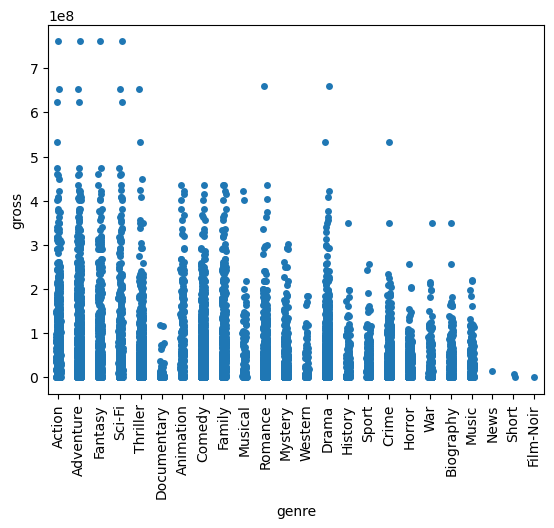

In [22]:
gross_column = data['gross']
indexes = []
for index in gross_column.index:
    if index in is_genre_columns.index:
        indexes.append(index)
t = pd.concat([gross_column.loc[indexes], is_genre_columns.loc[indexes]], axis=1)
t = t.dropna()
t = t.melt(id_vars = ['gross'], var_name='genre', value_vars=genres)
t = t.loc[t['value'] == 1]
sns.stripplot(data=t, x='genre', y='gross', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.show()

## Budget

### Cleaning data

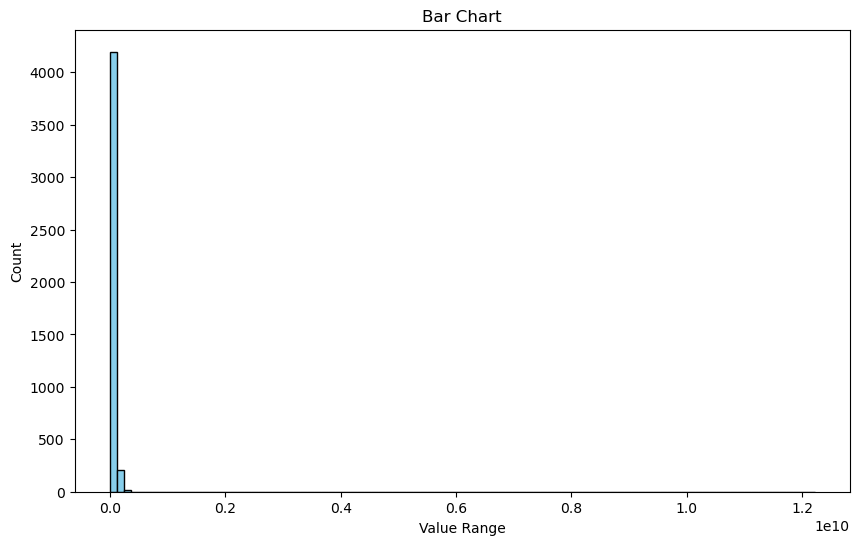

In [25]:
budget_column = data['budget'].drop(index=rows_to_delete)
show_bar_chart(list(budget_column.dropna()), 100)

In [26]:
data.loc[budget_column.idxmax()]

movie_title                                 The Host 
director_name                            Joon-ho Bong
num_critic_for_reviews                          363.0
duration                                        110.0
director_facebook_likes                         584.0
actor_3_facebook_likes                           74.0
actor_2_name                             Kang-ho Song
actor_1_facebook_likes                          629.0
gross                                       2201412.0
genres                     Comedy|Drama|Horror|Sci-Fi
actor_1_name                                Doona Bae
color                                           Color
                                      ...            
country                                   South Korea
content_rating                                      R
budget                                  12215500000.0
title_year                                     2006.0
actor_2_facebook_likes                          398.0
imdb_score                  

In [27]:
budget_column.loc[budget_column.idxmax()] = None

In [28]:
data.loc[budget_column.idxmax()]

movie_title                Lady Vengeance 
director_name               Chan-wook Park
num_critic_for_reviews               202.0
duration                             112.0
director_facebook_likes                0.0
actor_3_facebook_likes                38.0
actor_2_name                  Yeong-ae Lee
actor_1_facebook_likes               717.0
gross                             211667.0
genres                         Crime|Drama
actor_1_name                  Min-sik Choi
color                                Color
                                ...       
country                        South Korea
content_rating                           R
budget                        4200000000.0
title_year                          2005.0
actor_2_facebook_likes               126.0
imdb_score                             7.7
aspect_ratio                          2.35
movie_facebook_likes                  4000
Unnamed: 28                            NaN
war_symb_title                           2
point_symb_

In [29]:
budget_column.loc[budget_column.idxmax()] = None

In [30]:
data.loc[budget_column.idxmax()]

movie_title                        Fateless 
director_name                   Lajos Koltai
num_critic_for_reviews                  73.0
duration                               134.0
director_facebook_likes                 45.0
actor_3_facebook_likes                   0.0
actor_2_name                 Péter Fancsikai
actor_1_facebook_likes                   9.0
gross                               195888.0
genres                     Drama|Romance|War
actor_1_name                    Marcell Nagy
color                                  Color
                                 ...        
country                              Hungary
content_rating                             R
budget                          2500000000.0
title_year                            2005.0
actor_2_facebook_likes                   2.0
imdb_score                               7.1
aspect_ratio                            2.35
movie_facebook_likes                     607
Unnamed: 28                              NaN
war_symb_t

In [31]:
budget_column.loc[budget_column.idxmax()] = None

In [32]:
data.loc[budget_column.idxmax()]

movie_title                         Princess Mononoke 
director_name                           Hayao Miyazaki
num_critic_for_reviews                           174.0
duration                                         134.0
director_facebook_likes                         6000.0
actor_3_facebook_likes                           745.0
actor_2_name                        Jada Pinkett Smith
actor_1_facebook_likes                           893.0
gross                                        2298191.0
genres                     Adventure|Animation|Fantasy
actor_1_name                             Minnie Driver
color                                            Color
                                      ...             
country                                          Japan
content_rating                                   PG-13
budget                                    2400000000.0
title_year                                      1997.0
actor_2_facebook_likes                           851.0
imdb_score

In [33]:
budget_column.loc[budget_column.idxmax()] = None

In [34]:
data.loc[budget_column.idxmax()]

movie_title                                                        Steamboy 
director_name                                                Katsuhiro Ôtomo
num_critic_for_reviews                                                 105.0
duration                                                               103.0
director_facebook_likes                                                 78.0
actor_3_facebook_likes                                                 101.0
actor_2_name                                              Robin Atkin Downes
actor_1_facebook_likes                                                 488.0
gross                                                               410388.0
genres                     Action|Adventure|Animation|Family|Sci-Fi|Thriller
actor_1_name                                                William Hootkins
color                                                                  Color
                                                 ...                        

In [35]:
budget_column.loc[budget_column.idxmax()] = None

In [36]:
data.loc[budget_column.idxmax()]

movie_title                                 Akira 
director_name                      Katsuhiro Ôtomo
num_critic_for_reviews                       150.0
duration                                     124.0
director_facebook_likes                       78.0
actor_3_facebook_likes                         4.0
actor_2_name                         Takeshi Kusao
actor_1_facebook_likes                         6.0
gross                                     439162.0
genres                     Action|Animation|Sci-Fi
actor_1_name                          Mitsuo Iwata
color                                        Color
                                    ...           
country                                      Japan
content_rating                                   R
budget                                1100000000.0
title_year                                  1988.0
actor_2_facebook_likes                         5.0
imdb_score                                     8.1
aspect_ratio                   

In [37]:
budget_column.loc[budget_column.idxmax()] = None

In [38]:
data.loc[budget_column.idxmax()]

movie_title                                        Godzilla 2000 
director_name                                       Takao Okawara
num_critic_for_reviews                                      107.0
duration                                                     99.0
director_facebook_likes                                       2.0
actor_3_facebook_likes                                        3.0
actor_2_name                                        Naomi Nishida
actor_1_facebook_likes                                       43.0
gross                                                  10037390.0
genres                     Action|Adventure|Drama|Sci-Fi|Thriller
actor_1_name                                          Hiroshi Abe
color                                                       Color
                                            ...                  
country                                                     Japan
content_rating                                                 PG
budget    

In [39]:
budget_column.loc[budget_column.idxmax()] = None

In [40]:
data.loc[budget_column.idxmax()]

movie_title                Kabhi Alvida Naa Kehna 
director_name                          Karan Johar
num_critic_for_reviews                        20.0
duration                                     193.0
director_facebook_likes                      160.0
actor_3_facebook_likes                       860.0
actor_2_name                          John Abraham
actor_1_facebook_likes                      8000.0
gross                                    3275443.0
genres                                       Drama
actor_1_name                        Shah Rukh Khan
color                                        Color
                                    ...           
country                                      India
content_rating                                   R
budget                                 700000000.0
title_year                                  2006.0
actor_2_facebook_likes                      1000.0
imdb_score                                     6.0
aspect_ratio                   

In [41]:
budget_column.loc[budget_column.idxmax()] = None

In [42]:
data.loc[budget_column.idxmax()]

movie_title                            Tango 
director_name                    Carlos Saura
num_critic_for_reviews                   35.0
duration                                115.0
director_facebook_likes                  98.0
actor_3_facebook_likes                    4.0
actor_2_name               Juan Luis Galiardo
actor_1_facebook_likes                  341.0
gross                               1687311.0
genres                          Drama|Musical
actor_1_name                      Mía Maestro
color                                   Color
                                  ...        
country                                 Spain
content_rating                          PG-13
budget                            700000000.0
title_year                             1998.0
actor_2_facebook_likes                   26.0
imdb_score                                7.2
aspect_ratio                              2.0
movie_facebook_likes                      539
Unnamed: 28                       

In [43]:
budget_column.loc[budget_column.idxmax()] = None

In [44]:
data.loc[budget_column.idxmax()]

movie_title                                       Kites 
director_name                                Anurag Basu
num_critic_for_reviews                              41.0
duration                                            90.0
director_facebook_likes                            116.0
actor_3_facebook_likes                             303.0
actor_2_name                      Steven Michael Quezada
actor_1_facebook_likes                             594.0
gross                                          1602466.0
genres                     Action|Drama|Romance|Thriller
actor_1_name                                Bárbara Mori
color                                              Color
                                       ...              
country                                            India
content_rating                                       NaN
budget                                       600000000.0
title_year                                        2010.0
actor_2_facebook_likes         

In [45]:
budget_column.loc[budget_column.idxmax()] = None

In [46]:
data.loc[budget_column.idxmax()]

movie_title                                        Red Cliff 
director_name                                        John Woo
num_critic_for_reviews                                  160.0
duration                                                150.0
director_facebook_likes                                 610.0
actor_3_facebook_likes                                  478.0
actor_2_name                              Tony Chiu Wai Leung
actor_1_facebook_likes                                  755.0
gross                                                626809.0
genres                     Action|Adventure|Drama|History|War
actor_1_name                                Takeshi Kaneshiro
color                                                   Color
                                          ...                
country                                                 China
content_rating                                              R
budget                                            553632000.0
title_ye

In [47]:
budget_column.loc[budget_column.idxmax()] = None

In [48]:
data.loc[budget_column.idxmax()]

movie_title                         The Legend of Suriyothai 
director_name                             Chatrichalerm Yukol
num_critic_for_reviews                                   31.0
duration                                                300.0
director_facebook_likes                                   6.0
actor_3_facebook_likes                                    6.0
actor_2_name                             Chatchai Plengpanich
actor_1_facebook_likes                                    7.0
gross                                                454255.0
genres                     Action|Adventure|Drama|History|War
actor_1_name                             Sarunyu Wongkrachang
color                                                   Color
                                          ...                
country                                              Thailand
content_rating                                              R
budget                                            400000000.0
title_ye

In [49]:
budget_column.loc[budget_column.idxmax()] = None

In [50]:
data.loc[budget_column.idxmax()]

movie_title                The Messenger: The Story of Joan of Arc 
director_name                                            Luc Besson
num_critic_for_reviews                                        111.0
duration                                                      158.0
director_facebook_likes                                         0.0
actor_3_facebook_likes                                         15.0
actor_2_name                                           David Bailie
actor_1_facebook_likes                                         51.0
gross                                                    14131298.0
genres                        Adventure|Biography|Drama|History|War
actor_1_name                                            Paul Brooke
color                                                         Color
                                             ...                   
country                                                      France
content_rating                                  

In [51]:
budget_column.loc[budget_column.idxmax()] = None

In [52]:
data.loc[budget_column.idxmax()]

movie_title                Pirates of the Caribbean: At World's End 
director_name                                         Gore Verbinski
num_critic_for_reviews                                         302.0
duration                                                       169.0
director_facebook_likes                                        563.0
actor_3_facebook_likes                                        1000.0
actor_2_name                                           Orlando Bloom
actor_1_facebook_likes                                       40000.0
gross                                                    309404152.0
genres                                      Action|Adventure|Fantasy
actor_1_name                                             Johnny Depp
color                                                          Color
                                             ...                    
country                                                          USA
content_rating                    

### Analyze

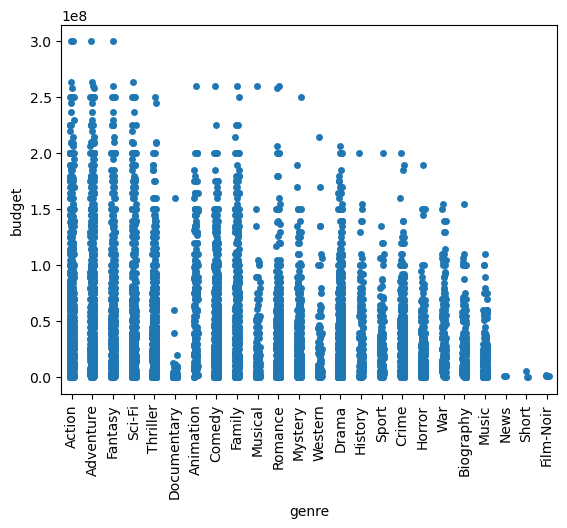

In [54]:
indexes = []
for index in budget_column.dropna().index:
    if index in is_genre_columns.index:
        indexes.append(index)
t = pd.concat([budget_column.dropna().loc[indexes], is_genre_columns.loc[indexes]], axis=1)
t = t.dropna()
t = t.melt(id_vars = ['budget'], var_name='genre', value_vars=genres)
t = t.loc[t['value'] == 1]
sns.stripplot(data=t, x='genre', y='budget', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.show()

## Content rating

### Data cleaning

In [57]:
data.loc[data['content_rating'] == 'USA']

,movie_title,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,color,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title,is_series
5038,Sanctuary,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,NaN,Comedy|Horror|Thriller,Julianna Pitt,Color,Quite a Conundrum,133,1111,John Lucas,nudity|party|pirate|swimsuit|three word title,https://www.imdb.com/title/tt15364972/,http://www.imdb.com/title/tt2049518/?ref_=fn_t...,8,English,USA,NaN,200000.0,2012.0,98.0,5.4,16,424.0,3,0,False


In [58]:
rows_to_delete.append(5038)

In [59]:
data.loc[data['content_rating'] == 'TV-MA']

,movie_title,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,color,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title,is_series
2825,Dekalog,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,Krystyna Janda,Color,12590,25,Olgierd Lukaszewicz,0,meaning of life|moral challenge|morality|searc...,http://www.imdb.com/title/tt0092337/?ref_=fn_t...,37,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0,NaN,1,0,False


In [60]:
rows_to_delete.append(2825)

In [61]:
data.loc[data['content_rating'] == 'NC-17']

,movie_title,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,color,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title,is_series
1289,Showgirls,Paul Verhoeven,181.0,131.0,719.0,683.0,Elizabeth Berkley,16000.0,20302961.0,Drama,Bobbie Phillips,Color,49874,18913,Robert Davi,0,cult film|lap dance|lap dancing|stripper|strip...,http://www.imdb.com/title/tt0114436/?ref_=fn_t...,450,English,France,NC-17,45000000.0,1995.0,893.0,4.6,2.35,0,NaN,2,0,False
3567,Shame,Steve McQueen,486.0,101.0,0.0,726.0,Nicole Beharie,13000.0,4000304.0,Drama,Michael Fassbender,Color,145395,15230,James Badge Dale,0,female frontal nudity|female nudity|male nudit...,http://www.imdb.com/title/tt1723811/?ref_=fn_t...,375,English,UK,NC-17,6500000.0,2011.0,898.0,7.3,2.35,23000,NaN,1,0,False
4292,Inside Deep Throat,Fenton Bailey,123.0,89.0,13.0,218.0,Bill Maher,373.0,653621.0,Biography|Documentary|History,Hugh M. Hefner,Black and White,5615,1136,Linda Lovelace,0,clitoris|deep throat|fellatio|oral sex|porn in...,http://www.imdb.com/title/tt0418753/?ref_=fn_t...,64,English,USA,NC-17,2000000.0,2005.0,334.0,6.8,1.85,592,NaN,2,0,False
4575,Orgazmo,Trey Parker,59.0,92.0,406.0,194.0,Dian Bachar,406.0,582024.0,Comedy|Sci-Fi,Trey Parker,Color,30396,904,Matt Stone,0,book of mormon|fight|mormon|ray gun|sidekick,http://www.imdb.com/title/tt0124819/?ref_=fn_t...,168,English,USA,NC-17,1000000.0,1997.0,203.0,6.2,1.85,0,NaN,2,0,False
4692,L.I.E.,Michael Cuesta,64.0,97.0,52.0,36.0,Bruce Altman,80.0,1141829.0,Crime|Drama,Adam LeFevre,Color,8509,209,Walter Masterson,1,ephebophile|pederasty|pedophilia|playing hooky...,http://www.imdb.com/title/tt0242587/?ref_=fn_t...,109,English,USA,NC-17,700000.0,2001.0,67.0,7.2,1.85,420,NaN,0,0,False
4814,The Evil Dead,Sam Raimi,304.0,96.0,0.0,58.0,Betsy Baker,634.0,NaN,Fantasy|Horror,Ted Raimi,Color,141219,813,Ellen Sandweiss,0,cult director|cult film|evil dead|necronomicon...,http://www.imdb.com/title/tt0083907/?ref_=fn_t...,740,English,USA,NC-17,375000.0,1981.0,66.0,7.6,1.37,12000,NaN,1,0,False
5032,Pink Flamingos,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,Divine,Color,16792,760,Edith Massey,2,absurd humor|egg|gross out humor|lesbian|sex,http://www.imdb.com/title/tt0069089/?ref_=fn_t...,183,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.37,0,NaN,1,0,False


In [62]:
content_rating_column = data['content_rating'].dropna().drop(index=rows_to_delete)
for index in content_rating_column.index:
    if content_rating_column.loc[index] == 'Not Rated':
        content_rating_column.loc[index] = 'Unrated'
    if content_rating_column.loc[index] == 'M':
        content_rating_column.loc[index] = 'PG'
    if content_rating_column.loc[index] == 'GP':
        content_rating_column.loc[index] = 'PG'
    if content_rating_column.loc[index] == 'X':
        content_rating_column.loc[index] = 'R'
    if content_rating_column.loc[index] == 'Passed':
        content_rating_column.loc[index] = 'Approved'
    if content_rating_column.loc[index] == 'TV-14':
        content_rating_column.loc[index] = 'PG-13'
    if content_rating_column.loc[index] == 'TV-G':
        content_rating_column.loc[index] = 'G'
    if content_rating_column.loc[index] == 'TV-PG':
        content_rating_column.loc[index] = 'PG'
content_rating_column

0       PG-13
1       PG-13
2       PG-13
3       PG-13
5       PG-13
7          PG
8       PG-13
9          PG
10      PG-13
11      PG-13
12      PG-13
13      PG-13
        ...  
38         PG
815        PG
40         PG
1705    PG-13
3159        R
1595    PG-13
1319    PG-13
318     PG-13
468     PG-13
1451        R
336        PG
6       PG-13
Name: content_rating, Length: 4559, dtype: object

In [63]:
cnt = {}
content_ratings = []
for content_rating in content_rating_column:
    cnt[content_rating] = cnt.get(content_rating, 0) + 1
    if content_rating not in content_ratings:
        content_ratings.append(content_rating)
cnt

{'PG-13': 1416,
 'PG': 700,
 'G': 117,
 'R': 2082,
 'Unrated': 174,
 'Approved': 63,
 'NC-17': 7}

In [64]:
content_rating_column = content_rating_column.to_frame()
for content_rating in content_ratings:
    content_rating_column[content_rating] = content_rating_column['content_rating'] == content_rating
content_rating_column = content_rating_column.drop(columns='content_rating')
content_rating_column

,PG-13,PG,G,R,Unrated,Approved,NC-17
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,True,False,False,False,False,False,False
9,False,True,False,False,False,False,False
10,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...


### Data analyze

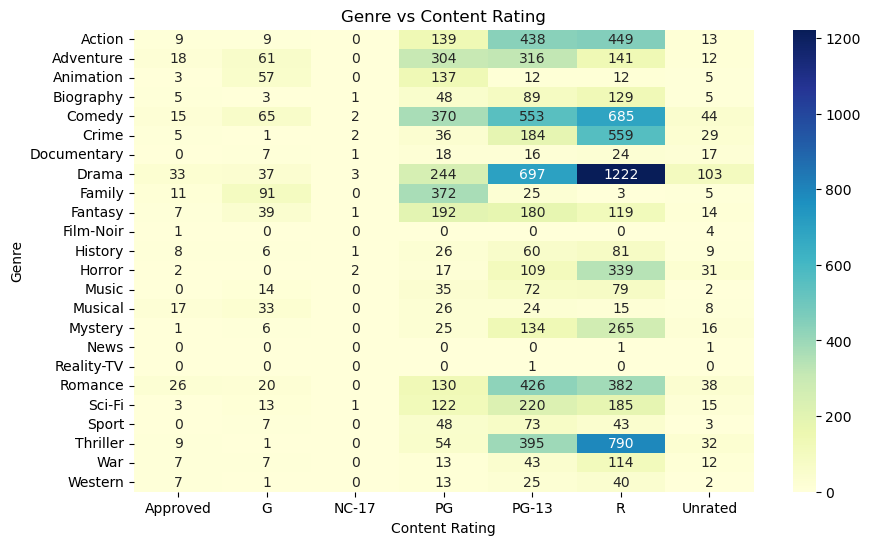

In [66]:
indexes = []
for index in content_rating_column.index:
    if index in is_genre_columns.index:
        indexes.append(index)
t = pd.concat([content_rating_column.loc[indexes], is_genre_columns.loc[indexes]], axis=1)
t = t.dropna()
t = t.melt(id_vars = content_ratings, var_name='genre', value_vars=genres)
t = t.loc[t['value'] == 1].drop(columns='value')
t = t.melt(id_vars = 'genre', var_name='content_rating', value_vars=content_ratings)
t = t.loc[t['value']]
cross_tab = pd.crosstab(t['genre'], t['content_rating'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Genre vs Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Genre')
plt.show()

## cast_total_facebook_likes

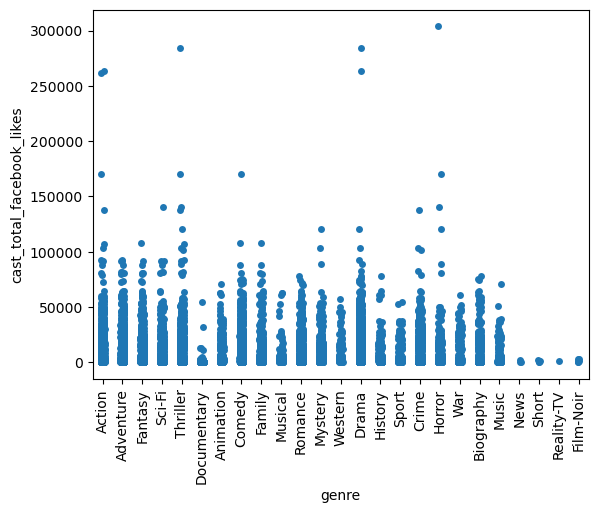

In [68]:
cast_total_facebook_likes_column = data['cast_total_facebook_likes'].dropna().drop(rows_to_delete + [1903])
indexes = []
for index in cast_total_facebook_likes_column.index:
    if index in is_genre_columns.index:
        indexes.append(index)
t = pd.concat([cast_total_facebook_likes_column.loc[indexes], is_genre_columns.loc[indexes]], axis=1)
t = t.dropna()
t = t.melt(id_vars = ['cast_total_facebook_likes'], var_name='genre', value_vars=genres)
t = t.loc[t['value'] == 1]
sns.stripplot(data=t, x='genre', y='cast_total_facebook_likes', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.show()

In [69]:
data.loc[cast_total_facebook_likes_column.idxmax()]

movie_title                The Final Destination 
director_name                      David R. Ellis
num_critic_for_reviews                      221.0
duration                                     82.0
director_facebook_likes                     160.0
actor_3_facebook_likes                      748.0
actor_2_name                      Andrew Fiscella
actor_1_facebook_likes                   164000.0
gross                                  66466372.0
genres                                     Horror
actor_1_name                         Krista Allen
color                                       Color
                                    ...          
country                                       USA
content_rating                                  R
budget                                 40000000.0
title_year                                 2009.0
actor_2_facebook_likes                   137000.0
imdb_score                                    5.2
aspect_ratio                                 2.35


## movie_facebook_likes

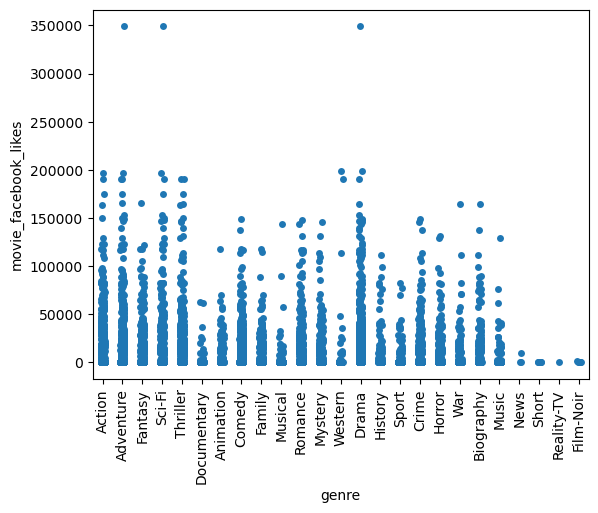

In [71]:
movie_facebook_likes_column = data['movie_facebook_likes'].dropna().drop(rows_to_delete)
indexes = []
for index in movie_facebook_likes_column.index:
    if index in is_genre_columns.index:
        indexes.append(index)
t = pd.concat([movie_facebook_likes_column.loc[indexes], is_genre_columns.loc[indexes]], axis=1)
t = t.dropna()
t = t.melt(id_vars = ['movie_facebook_likes'], var_name='genre', value_vars=genres)
t = t.loc[t['value'] == 1]
sns.stripplot(data=t, x='genre', y='movie_facebook_likes', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.show()

## title_year

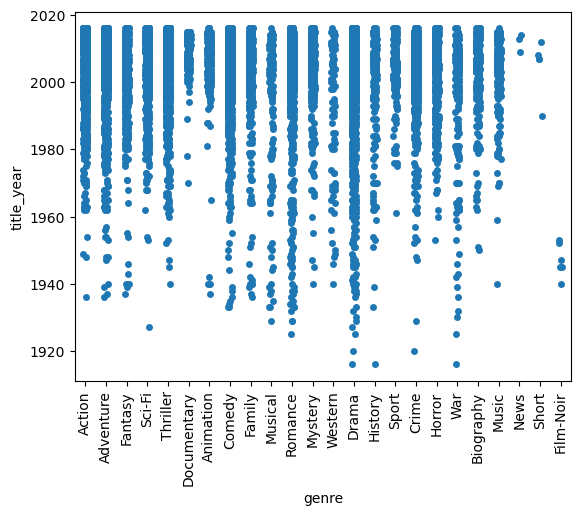

In [73]:
title_year_column = data['title_year'].drop(rows_to_delete).dropna()
indexes = []
for index in title_year_column.index:
    if index in is_genre_columns.index:
        indexes.append(index)
t = pd.concat([title_year_column.loc[indexes], is_genre_columns.loc[indexes]], axis=1)
t = t.dropna()
t = t.melt(id_vars = ['title_year'], var_name='genre', value_vars=genres)
t = t.loc[t['value'] == 1]
sns.stripplot(data=t, x='genre', y='title_year', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.show()

## num_voted_users

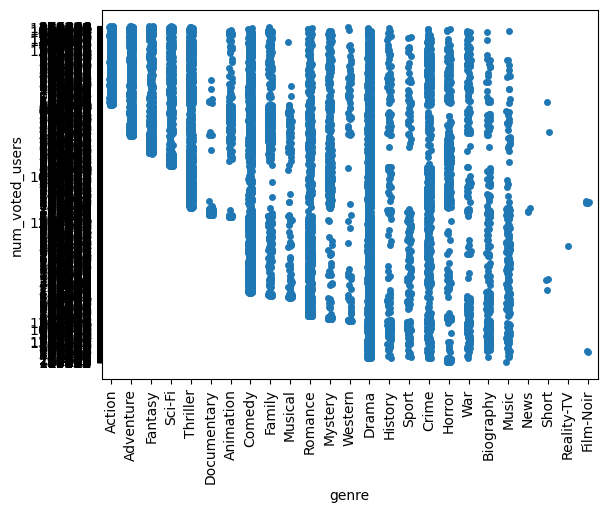

In [75]:
num_voted_users_column = data['num_voted_users'].drop(rows_to_delete).dropna()
indexes = []
for index in num_voted_users_column.index:
    if index in is_genre_columns.index:
        indexes.append(index)
t = pd.concat([num_voted_users_column.loc[indexes], is_genre_columns.loc[indexes]], axis=1)
t = t.dropna()
t = t.melt(id_vars = ['num_voted_users'], var_name='genre', value_vars=genres)
t = t.loc[t['value'] == 1]
sns.stripplot(data=t, x='genre', y='num_voted_users', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.show()

## imdb_score

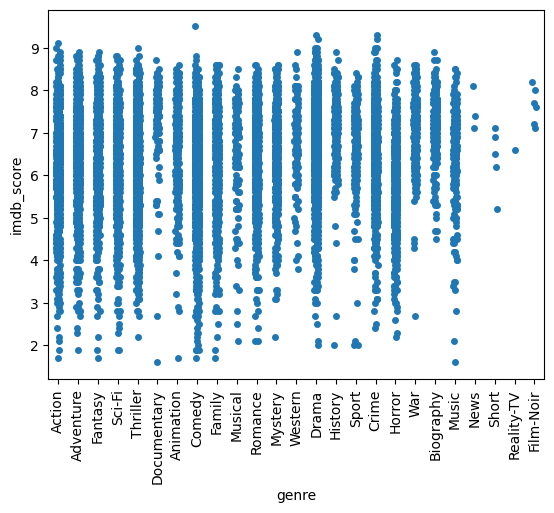

In [77]:
imdb_score_column = data['imdb_score'].drop(rows_to_delete).dropna()
indexes = []
for index in imdb_score_column.index:
    if index in is_genre_columns.index:
        indexes.append(index)
t = pd.concat([imdb_score_column.loc[indexes], is_genre_columns.loc[indexes]], axis=1)
t = t.dropna()
t = t.melt(id_vars = ['imdb_score'], var_name='genre', value_vars=genres)
t = t.loc[t['value'] == 1]
sns.stripplot(data=t, x='genre', y='imdb_score', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.show()

## Data union

In [79]:
indexes = []
for index in is_genre_columns.index:
    if index in budget_column.dropna().index and index in content_rating_column.dropna().index \
    and index in cast_total_facebook_likes_column.dropna().index and index in movie_facebook_likes_column.dropna().index \
    and index in title_year_column.dropna().index and index in num_voted_users_column.dropna().index \
    and index in imdb_score_column.dropna().index and index in gross_column.dropna().index:
        indexes.append(index)

In [80]:
X = pd.concat([gross_column.loc[indexes], budget_column.loc[indexes], content_rating_column.loc[indexes], 
               cast_total_facebook_likes_column.loc[indexes], movie_facebook_likes_column.loc[indexes], 
               title_year_column.loc[indexes], num_voted_users_column.loc[indexes], imdb_score_column.loc[indexes]], axis=1)
y = is_genre_columns.loc[indexes].drop(columns=['Film-Noir', 'Reality-TV', 'Short', 'News'])
X

,gross,budget,PG-13,PG,G,R,Unrated,Approved,NC-17,cast_total_facebook_likes,movie_facebook_likes,title_year,num_voted_users,imdb_score
0,760505847.0,237000000.0,True,False,False,False,False,False,False,4834,33000,2009.0,886204,7.9
1,309404152.0,300000000.0,True,False,False,False,False,False,False,48350,0,2007.0,471220,7.1
2,200074175.0,245000000.0,True,False,False,False,False,False,False,11700,85000,2015.0,275868,6.8
3,448130642.0,250000000.0,True,False,False,False,False,False,False,106759,164000,2012.0,1144337,8.5
5,73058679.0,263700000.0,True,False,False,False,False,False,False,1873,24000,2012.0,212204,6.6
7,200807262.0,260000000.0,False,True,False,False,False,False,False,2036,29000,2010.0,294810,7.8
8,458991599.0,250000000.0,True,False,False,False,False,False,False,92000,118000,2015.0,462669,7.5
9,301956980.0,250000000.0,False,True,False,False,False,False,False,58753,10000,2009.0,321795,7.5
10,330249062.0,250000000.0,True,False,False,False,False,False,False,24450,197000,2016.0,371639,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


# Models

## Help functions

In [357]:
def find_best_threshold(y_true, probabilities):
    probabilities = np.array(probabilities)
    best_thresholds = []
    for i in range(len(probabilities)):
        f1_scores = []
        for threshold in probabilities[i, :, 1]:
            y_pred = (probabilities[i, :, 1] >= threshold).astype(int)
            f1 = f1_score(y_true[:, i], y_pred)
            f1_scores.append(f1)
        best_thresholds.append(probabilities[i, np.argmax(f1_scores), 1])
    return np.array(best_thresholds)

## Models selection

### RandomForestClassifier

#### Tuning

50
100
150
200
250
300
350
400
450


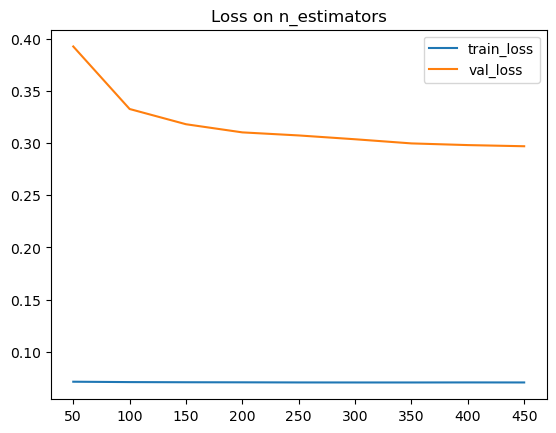

In [419]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
train_losses = []
val_losses = []
par_range = np.arange(50, 500, 50)
for n_estimators in par_range:
    train_loss = 0
    val_loss = 0
    print(n_estimators)
    for train_index, val_index in kf.split(X_train_val):
        base_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=6)
        multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
        y_predicted = np.array(multi_target_classifier.predict_proba(X_train_val[train_index]))[:, :, 1]
        y_predicted = y_predicted.transpose()
        y_true = y_train_val[train_index]
        label_loss = 0
        for i in range(y_predicted.shape[1]):
            label_loss += log_loss(y_true[:, i], y_predicted[:, i])
        label_loss /= y_predicted.shape[1]
        train_loss += label_loss
        y_predicted = np.array(multi_target_classifier.predict_proba(X_train_val[val_index]))[:, :, 1]
        y_predicted = y_predicted.transpose()
        y_true = y_train_val[val_index]
        label_loss = 0
        for i in range(y_predicted.shape[1]):
            label_loss += log_loss(y_true[:, i], y_predicted[:, i])
        label_loss /= y_predicted.shape[1]
        val_loss += label_loss
    train_loss /= 5
    val_loss /= 5
    train_losses.append(train_loss)
    val_losses.append(val_loss)
plt.plot(par_range, train_losses, label='train_loss')
plt.plot(par_range, val_losses, label='val_loss')
plt.legend()
plt.title('Loss on n_estimators')
plt.show()

#### Results

In [421]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
class_report = None
for train_index, val_index in kf.split(X_train_val):
    base_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict(X_train_val[val_index])
    y_probabil = np.array(multi_target_classifier.predict_proba(X_train_val[val_index]))
    best_thresholds = find_best_threshold(y_train_val[val_index], y_probabil)
    y_pred = (y_probabil[:, :, 1] >= best_thresholds.reshape((-1, 1))).astype(int).transpose()
    if class_report is None:
        class_report = pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                          output_dict=True)).transpose()
    else:
        class_report += pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                           output_dict=True)).transpose()
class_report /= folds
pd.set_option('display.max_rows', None)
print(class_report)
pd.set_option('display.max_rows', False)
print(class_report['f1-score']['samples avg'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score  support
Action         0.531866  0.640193  0.577079    145.4
Adventure      0.605530  0.641294  0.619050    118.2
Fantasy        0.366096  0.547115  0.411118     76.8
Sci-Fi         0.325030  0.447942  0.371577     77.0
Thriller       0.445267  0.773973  0.563024    171.2
Documentary    0.663000  0.443810  0.497013      9.2
Animation      0.757617  0.627635  0.672257     31.2
Comedy         0.563999  0.731638  0.632931    235.4
Family         0.811060  0.875550  0.837832     67.8
Musical        0.320777  0.379081  0.344125     15.0
Romance        0.303019  0.704956  0.423113    139.0
Mystery        0.153192  0.565320  0.240871     60.6
Western        0.051825  0.348117  0.080673      9.2
Drama          0.730756  0.829812  0.775065    306.4
History        0.218247  0.322941  0.223710     23.6
Sport          0.467507  0.279745  0.148033     23.4
Crime          0.347105  0.576435  0.432043    109.8
Horror         0.478025  0.558277  0.504164   

In [277]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
class_report = None
for train_index, val_index in kf.split(X_train_val):
    base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict(X_train_val[val_index])
    if class_report is None:
        class_report = pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                          output_dict=True)).transpose()
    else:
        class_report += pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                           output_dict=True)).transpose()
class_report /= folds
pd.set_option('display.max_rows', None)
print(class_report)
pd.set_option('display.max_rows', False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

              precision    recall  f1-score  support
Action         0.697841  0.365200  0.478297    145.4
Adventure      0.692142  0.431954  0.529371    118.2
Fantasy        0.536869  0.134986  0.215143     76.8
Sci-Fi         0.547622  0.078138  0.133477     77.0
Thriller       0.573971  0.311191  0.403280    171.2
Documentary    0.600000  0.200000  0.292308      9.2
Animation      0.789531  0.484727  0.596990     31.2
Comedy         0.658232  0.465471  0.544898    235.4
Family         0.810762  0.793924  0.801053     67.8
Musical        0.450000  0.052619  0.091667     15.0
Romance        0.452207  0.088880  0.148041    139.0
Mystery        0.000000  0.000000  0.000000     60.6
Western        0.000000  0.000000  0.000000      9.2
Drama          0.761540  0.758599  0.759927    306.4
History        0.000000  0.000000  0.000000     23.6
Sport          0.000000  0.000000  0.000000     23.4
Crime          0.489966  0.103536  0.168450    109.8
Horror         0.652583  0.161729  0.256143   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVC

#### Results

In [83]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
class_report = None
for train_index, val_index in kf.split(X_train_val):
    base_classifier = SVC(kernel='rbf')
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict(X_train_val[val_index])
    if class_report is None:
        class_report = pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                          output_dict=True)).transpose()
    else:
        class_report += pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                           output_dict=True)).transpose()
class_report /= folds
pd.set_option('display.max_rows', None)
print(class_report)
pd.set_option('display.max_rows', False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

              precision    recall  f1-score  support
Action         0.819506  0.169823  0.280563    145.4
Adventure      0.762706  0.362491  0.485847    118.2
Fantasy        0.671190  0.061120  0.111417     76.8
Sci-Fi         0.050000  0.002778  0.005263     77.0
Thriller       0.000000  0.000000  0.000000    171.2
Documentary    0.000000  0.000000  0.000000      9.2
Animation      0.660124  0.371184  0.464127     31.2
Comedy         0.641704  0.268513  0.377881    235.4
Family         0.785526  0.844546  0.812615     67.8
Musical        0.266667  0.071841  0.109281     15.0
Romance        0.000000  0.000000  0.000000    139.0
Mystery        0.000000  0.000000  0.000000     60.6
Western        0.000000  0.000000  0.000000      9.2
Drama          0.702396  0.764121  0.731732    306.4
History        0.000000  0.000000  0.000000     23.6
Sport          0.000000  0.000000  0.000000     23.4
Crime          0.000000  0.000000  0.000000    109.8
Horror         0.000000  0.000000  0.000000   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [366]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
class_report = None
for train_index, val_index in kf.split(X_train_val):
    base_classifier = SVC(kernel='rbf', probability=True)
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict(X_train_val[val_index])
    y_probabil = np.array(multi_target_classifier.predict_proba(X_train_val[val_index]))
    best_thresholds = find_best_threshold(y_train_val[val_index], y_probabil)
    y_pred = (y_probabil[:, :, 1] >= best_thresholds.reshape((-1, 1))).astype(int).transpose()
    if class_report is None:
        class_report = pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                          output_dict=True)).transpose()
    else:
        class_report += pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                           output_dict=True)).transpose()
class_report /= folds
pd.set_option('display.max_rows', None)
print(class_report)
pd.set_option('display.max_rows', False)
print(class_report['f1-score']['samples avg'])

              precision    recall  f1-score  support
Action         0.459700  0.707870  0.556032    145.4
Adventure      0.583390  0.661354  0.617483    118.2
Fantasy        0.416003  0.416919  0.406469     76.8
Sci-Fi         0.327457  0.480768  0.387581     77.0
Thriller       0.442290  0.774492  0.561127    171.2
Documentary    0.352358  0.452381  0.375606      9.2
Animation      0.674718  0.711256  0.677651     31.2
Comedy         0.474906  0.870142  0.612874    235.4
Family         0.796262  0.882974  0.836765     67.8
Musical        0.566320  0.261098  0.330245     15.0
Romance        0.294531  0.763454  0.413566    139.0
Mystery        0.161053  0.580186  0.234563     60.6
Western        0.131398  0.247468  0.125456      9.2
Drama          0.680588  0.843533  0.752277    306.4
History        0.141223  0.285409  0.179765     23.6
Sport          0.132202  0.556154  0.116188     23.4
Crime          0.266240  0.673408  0.376699    109.8
Horror         0.422604  0.503624  0.454791   

### SGDClassifier

#### Tuning

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19


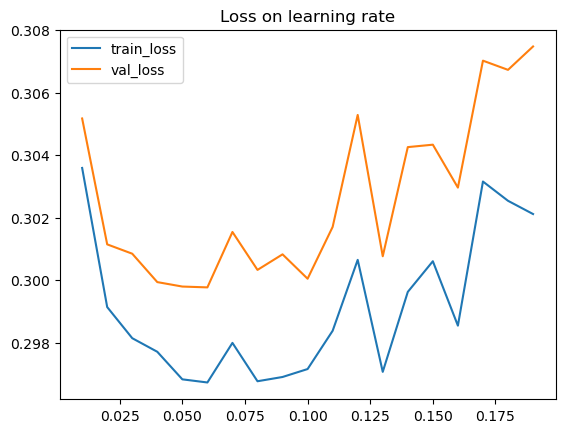

In [431]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
train_losses = []
val_losses = []
par_range = np.arange(0.01, 0.2, 0.01)
for eta0 in par_range:
    train_loss = 0
    val_loss = 0
    print(eta0)
    for train_index, val_index in kf.split(X_train_val):
        base_classifier = SGDClassifier(loss="log_loss", early_stopping=True, learning_rate='constant', eta0=eta0)
        multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=6)
        multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
        y_predicted = np.array(multi_target_classifier.predict_proba(X_train_val[train_index]))[:, :, 1]
        y_predicted = y_predicted.transpose()
        y_true = y_train_val[train_index]
        label_loss = 0
        for i in range(y_predicted.shape[1]):
            label_loss += log_loss(y_true[:, i], y_predicted[:, i])
        label_loss /= y_predicted.shape[1]
        train_loss += label_loss
        y_predicted = np.array(multi_target_classifier.predict_proba(X_train_val[val_index]))[:, :, 1]
        y_predicted = y_predicted.transpose()
        y_true = y_train_val[val_index]
        label_loss = 0
        for i in range(y_predicted.shape[1]):
            label_loss += log_loss(y_true[:, i], y_predicted[:, i])
        label_loss /= y_predicted.shape[1]
        val_loss += label_loss
    train_loss /= 5
    val_loss /= 5
    train_losses.append(train_loss)
    val_losses.append(val_loss)
plt.plot(par_range, train_losses, label='train_loss')
plt.plot(par_range, val_losses, label='val_loss')
plt.legend()
plt.title('Loss on learning rate')
plt.show()

#### Results

In [437]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
class_report = None
for train_index, val_index in kf.split(X_train_val):
    base_classifier = SGDClassifier(loss="log_loss", early_stopping=True)
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict(X_train_val[val_index])
    y_probabil = np.array(multi_target_classifier.predict_proba(X_train_val[val_index]))
    best_thresholds = find_best_threshold(y_train_val[val_index], y_probabil)
    y_pred = (y_probabil[:, :, 1] >= best_thresholds.reshape((-1, 1))).astype(int).transpose()
    if class_report is None:
        class_report = pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                          output_dict=True)).transpose()
    else:
        class_report += pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                           output_dict=True)).transpose()
class_report /= folds
pd.set_option('display.max_rows', None)
print(class_report)
pd.set_option('display.max_rows', False)
print(class_report['f1-score']['samples avg'])

              precision    recall  f1-score  support
Action         0.424684  0.663652  0.515367    145.4
Adventure      0.597922  0.616391  0.599330    118.2
Fantasy        0.345754  0.509468  0.401968     76.8
Sci-Fi         0.366160  0.459461  0.399504     77.0
Thriller       0.373576  0.883068  0.524010    171.2
Documentary    0.385097  0.417143  0.361781      9.2
Animation      0.657011  0.699104  0.675847     31.2
Comedy         0.460589  0.896838  0.605783    235.4
Family         0.799283  0.866929  0.830866     67.8
Musical        0.396454  0.406917  0.396195     15.0
Romance        0.294403  0.784190  0.418491    139.0
Mystery        0.142964  0.755215  0.229587     60.6
Western        0.232949  0.218896  0.125898      9.2
Drama          0.642834  0.873265  0.738532    306.4
History        0.157921  0.354240  0.189530     23.6
Sport          0.139850  0.345002  0.188157     23.4
Crime          0.271700  0.738774  0.394587    109.8
Horror         0.300848  0.588409  0.394144   

In [368]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
class_report = None
for train_index, val_index in kf.split(X_train_val):
    base_classifier = SGDClassifier()
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict(X_train_val[val_index])
    if class_report is None:
        class_report = pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                          output_dict=True)).transpose()
    else:
        class_report += pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                           output_dict=True)).transpose()
class_report /= folds
pd.set_option('display.max_rows', None)
print(class_report)
pd.set_option('display.max_rows', False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

              precision    recall  f1-score  support
Action         0.701676  0.256451  0.366510    145.4
Adventure      0.748350  0.386336  0.480797    118.2
Fantasy        0.000000  0.000000  0.000000     76.8
Sci-Fi         0.200000  0.002273  0.004494     77.0
Thriller       0.000000  0.000000  0.000000    171.2
Documentary    0.000000  0.000000  0.000000      9.2
Animation      0.747455  0.414016  0.512436     31.2
Comedy         0.598885  0.384037  0.426568    235.4
Family         0.769239  0.819287  0.775989     67.8
Musical        0.466667  0.085174  0.134281     15.0
Romance        0.000000  0.000000  0.000000    139.0
Mystery        0.000000  0.000000  0.000000     60.6
Western        0.000000  0.000000  0.000000      9.2
Drama          0.642992  0.831554  0.720067    306.4
History        0.000000  0.000000  0.000000     23.6
Sport          0.000000  0.000000  0.000000     23.4
Crime          0.000000  0.000000  0.000000    109.8
Horror         0.000000  0.000000  0.000000   

### MultinomialNB

#### Tuning

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6
2.7
2.8000000000000003
2.9000000000000004
best = 0.6


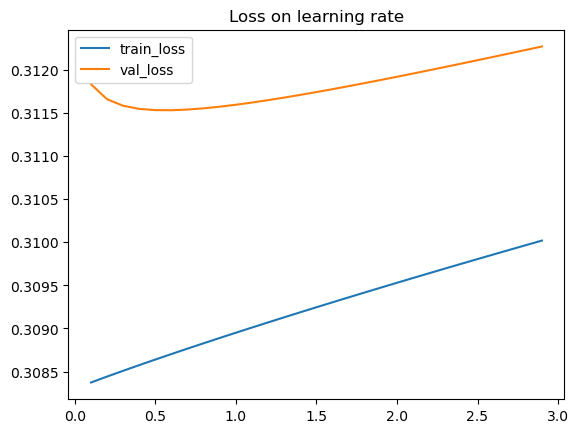

In [459]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
train_losses = []
val_losses = []
par_range = np.arange(0.1, 3, 0.1)
for alpha in par_range:
    train_loss = 0
    val_loss = 0
    print(alpha)
    for train_index, val_index in kf.split(X_train_val):
        base_classifier = MultinomialNB(alpha=alpha)
        multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=6)
        multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
        y_predicted = np.array(multi_target_classifier.predict_proba(X_train_val[train_index]))[:, :, 1]
        y_predicted = y_predicted.transpose()
        y_true = y_train_val[train_index]
        label_loss = 0
        for i in range(y_predicted.shape[1]):
            label_loss += log_loss(y_true[:, i], y_predicted[:, i])
        label_loss /= y_predicted.shape[1]
        train_loss += label_loss
        y_predicted = np.array(multi_target_classifier.predict_proba(X_train_val[val_index]))[:, :, 1]
        y_predicted = y_predicted.transpose()
        y_true = y_train_val[val_index]
        label_loss = 0
        for i in range(y_predicted.shape[1]):
            label_loss += log_loss(y_true[:, i], y_predicted[:, i])
        label_loss /= y_predicted.shape[1]
        val_loss += label_loss
    train_loss /= 5
    val_loss /= 5
    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f"best = {par_range[np.argmin(val_losses)]}")
plt.plot(par_range, train_losses, label='train_loss')
plt.plot(par_range, val_losses, label='val_loss')
plt.legend()
plt.title('Loss on learning rate')
plt.show()

0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.5900000000000001
0.6000000000000001
0.6100000000000001
0.6200000000000001
0.6300000000000001
0.6400000000000001
0.6500000000000001
0.6600000000000001
0.6700000000000002
0.6800000000000002
0.6900000000000002
best = 0.56


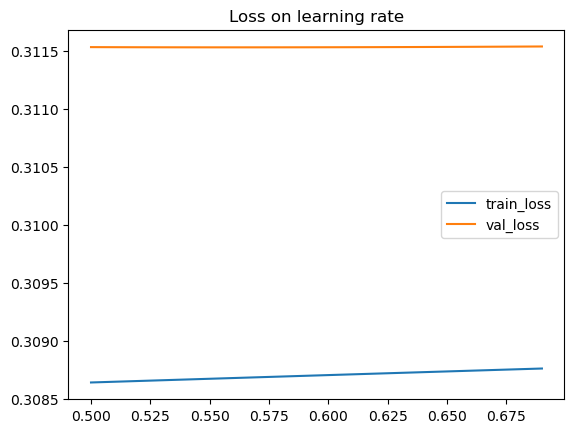

In [457]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
train_losses = []
val_losses = []
par_range = np.arange(0.5, 0.7, 0.01)
for alpha in par_range:
    train_loss = 0
    val_loss = 0
    print(alpha)
    for train_index, val_index in kf.split(X_train_val):
        base_classifier = MultinomialNB(alpha=alpha)
        multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=6)
        multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
        y_predicted = np.array(multi_target_classifier.predict_proba(X_train_val[train_index]))[:, :, 1]
        y_predicted = y_predicted.transpose()
        y_true = y_train_val[train_index]
        label_loss = 0
        for i in range(y_predicted.shape[1]):
            label_loss += log_loss(y_true[:, i], y_predicted[:, i])
        label_loss /= y_predicted.shape[1]
        train_loss += label_loss
        y_predicted = np.array(multi_target_classifier.predict_proba(X_train_val[val_index]))[:, :, 1]
        y_predicted = y_predicted.transpose()
        y_true = y_train_val[val_index]
        label_loss = 0
        for i in range(y_predicted.shape[1]):
            label_loss += log_loss(y_true[:, i], y_predicted[:, i])
        label_loss /= y_predicted.shape[1]
        val_loss += label_loss
    train_loss /= 5
    val_loss /= 5
    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f"best = {par_range[np.argmin(val_losses)]}")
plt.plot(par_range, train_losses, label='train_loss')
plt.plot(par_range, val_losses, label='val_loss')
plt.legend()
plt.title('Loss on learning rate')
plt.show()

#### Results

In [461]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
class_report = None
for train_index, val_index in kf.split(X_train_val):
    base_classifier = MultinomialNB(alpha=0.56)
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict(X_train_val[val_index])
    if class_report is None:
        class_report = pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                          output_dict=True)).transpose()
    else:
        class_report += pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                           output_dict=True)).transpose()
class_report /= folds
pd.set_option('display.max_rows', None)
print(class_report)
pd.set_option('display.max_rows', False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

              precision    recall  f1-score  support
Action         0.850000  0.025207  0.048838    145.4
Adventure      0.699158  0.208128  0.316604    118.2
Fantasy        0.200000  0.002381  0.004706     76.8
Sci-Fi         0.000000  0.000000  0.000000     77.0
Thriller       0.000000  0.000000  0.000000    171.2
Documentary    0.000000  0.000000  0.000000      9.2
Animation      0.651209  0.236476  0.336574     31.2
Comedy         0.589179  0.260758  0.361050    235.4
Family         0.613546  0.940798  0.741939     67.8
Musical        0.466667  0.085174  0.134281     15.0
Romance        0.000000  0.000000  0.000000    139.0
Mystery        0.000000  0.000000  0.000000     60.6
Western        0.000000  0.000000  0.000000      9.2
Drama          0.617563  0.701950  0.655787    306.4
History        0.000000  0.000000  0.000000     23.6
Sport          0.000000  0.000000  0.000000     23.4
Crime          0.000000  0.000000  0.000000    109.8
Horror         0.000000  0.000000  0.000000   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [463]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
class_report = None
for train_index, val_index in kf.split(X_train_val):
    base_classifier = MultinomialNB(alpha=0.56)
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict(X_train_val[val_index])
    y_probabil = np.array(multi_target_classifier.predict_proba(X_train_val[val_index]))
    best_thresholds = find_best_threshold(y_train_val[val_index], y_probabil)
    y_pred = (y_probabil[:, :, 1] >= best_thresholds.reshape((-1, 1))).astype(int).transpose()
    if class_report is None:
        class_report = pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                          output_dict=True)).transpose()
    else:
        class_report += pd.DataFrame(classification_report(y_train_val[val_index], y_pred, target_names=y_test.columns, 
                                                           output_dict=True)).transpose()
class_report /= folds
pd.set_option('display.max_rows', None)
print(class_report)
pd.set_option('display.max_rows', False)
print(class_report['f1-score']['samples avg'])

              precision    recall  f1-score  support
Action         0.331669  0.831110  0.472749    145.4
Adventure      0.529337  0.684791  0.593542    118.2
Fantasy        0.345920  0.556779  0.417213     76.8
Sci-Fi         0.313195  0.455259  0.342674     77.0
Thriller       0.376072  0.883327  0.526917    171.2
Documentary    0.495896  0.385714  0.370260      9.2
Animation      0.609474  0.708315  0.640772     31.2
Comedy         0.451873  0.875894  0.592099    235.4
Family         0.715691  0.911676  0.800863     67.8
Musical        0.474048  0.421203  0.429586     15.0
Romance        0.295235  0.717091  0.418061    139.0
Mystery        0.143015  0.689736  0.233871     60.6
Western        0.165287  0.388377  0.086994      9.2
Drama          0.585679  0.909729  0.707353    306.4
History        0.077461  0.440101  0.118683     23.6
Sport          0.102748  0.349539  0.153169     23.4
Crime          0.295173  0.694055  0.412932    109.8
Horror         0.173153  0.696373  0.273417   

### Curves

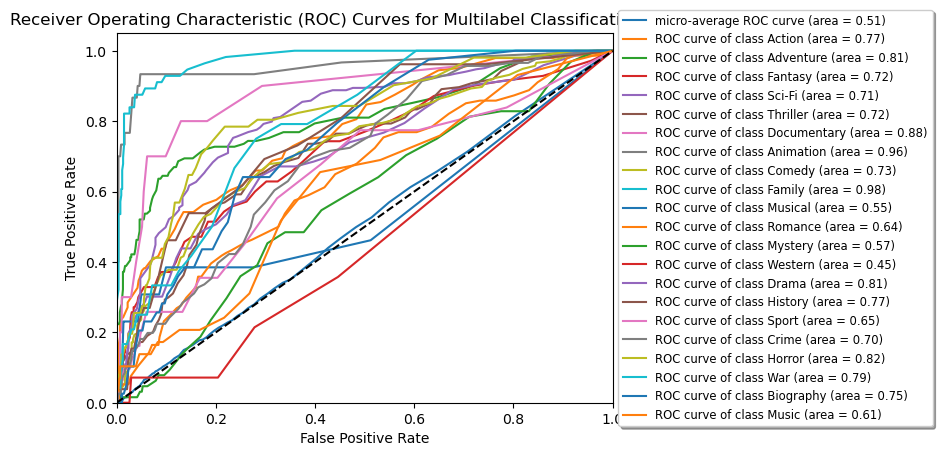

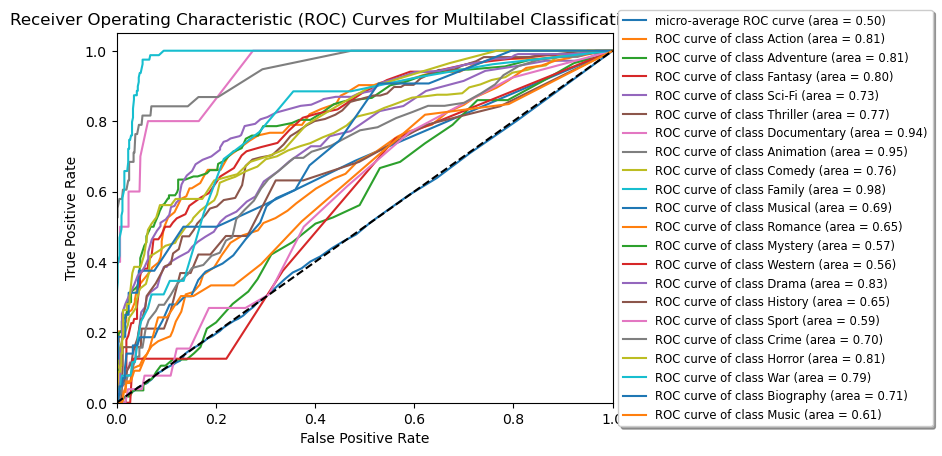

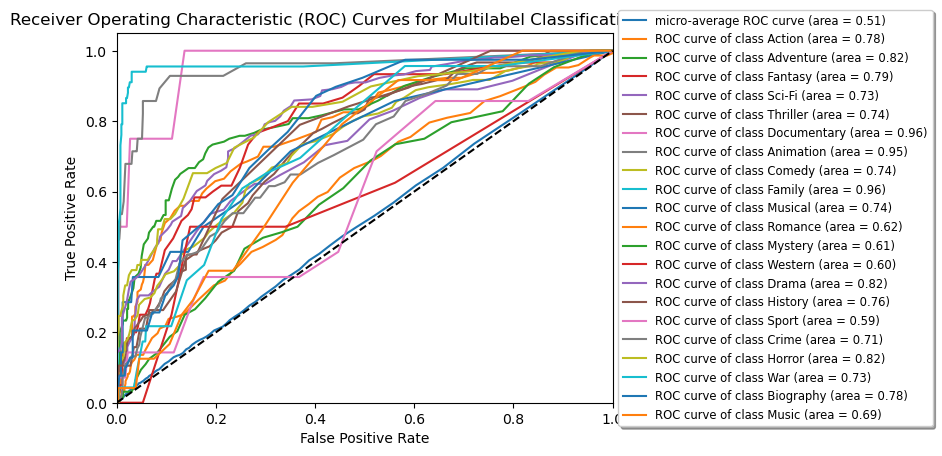

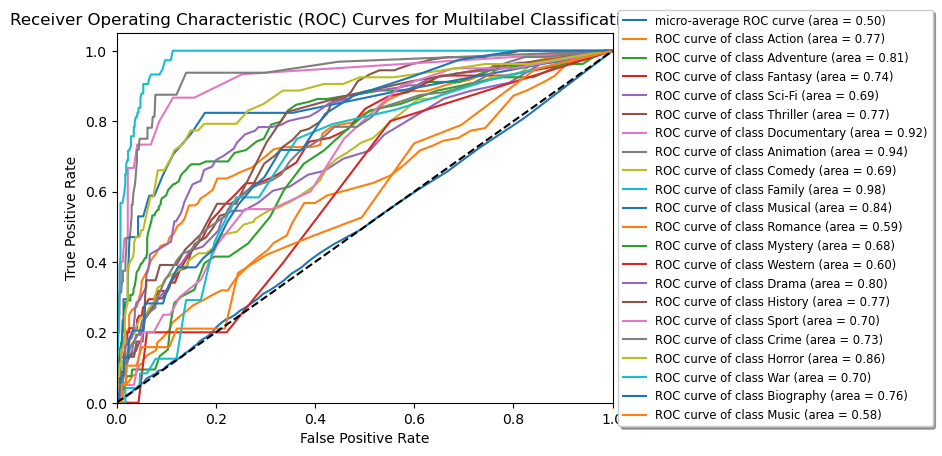

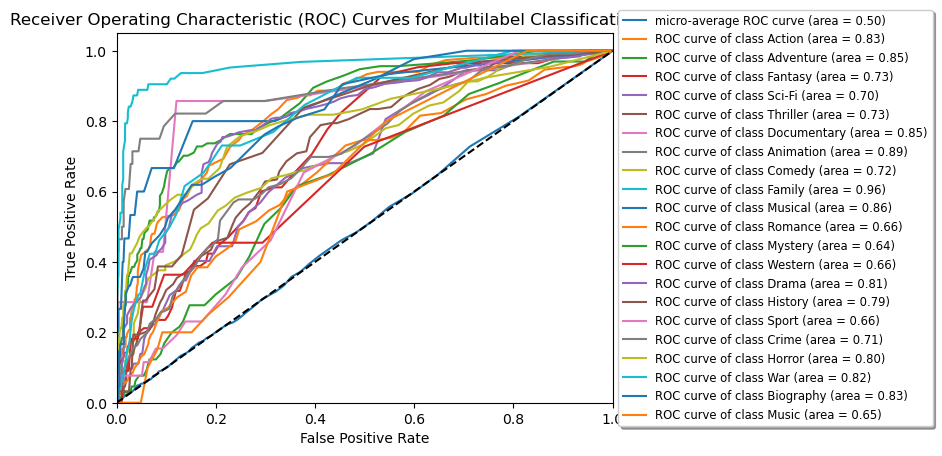

In [327]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
fold_number = 0
for train_index, val_index in kf.split(X_train_val):
    base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict_proba(X_train_val[val_index])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_train_val[val_index][:, i], y_pred[i][:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_train_val[val_index].ravel(), np.array([y_pred[i][:, 1] for i in range(y.shape[1])]).ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
    
    for i in range(y.shape[1]):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(y_test.columns[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves for Multilabel Classification on fold {fold_number}')
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', fancybox=True, shadow=True)
    plt.show()
    fold_number += 1

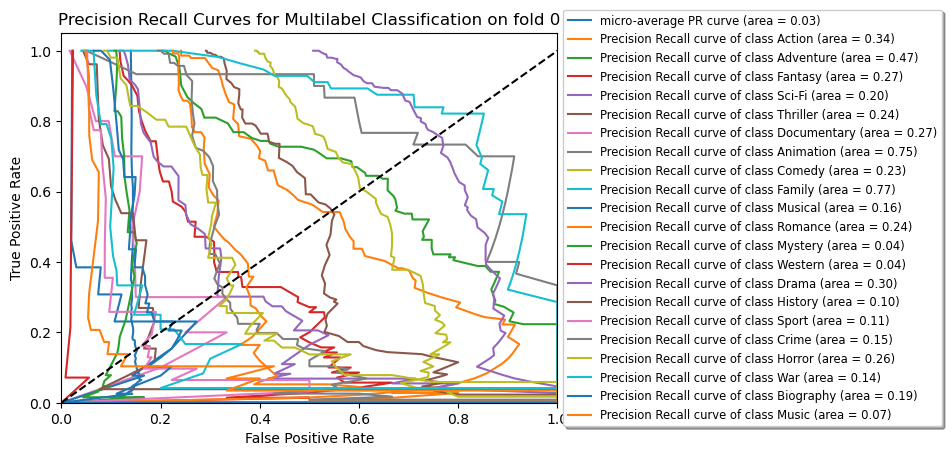

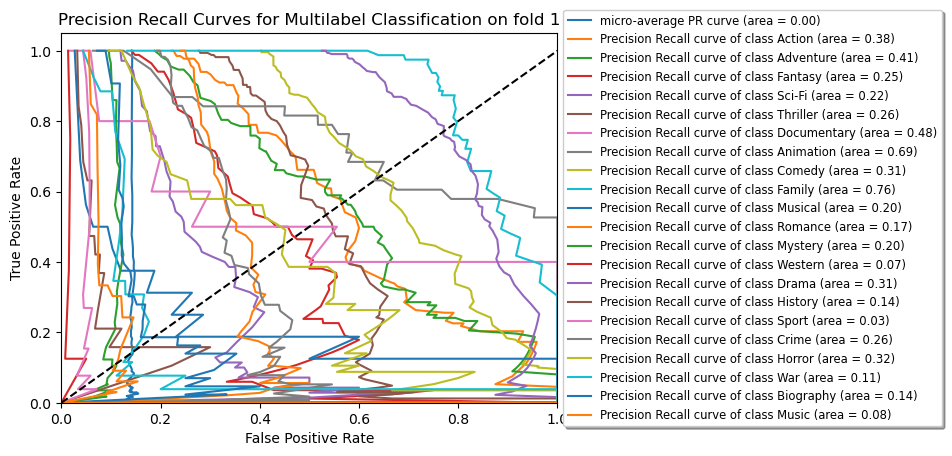

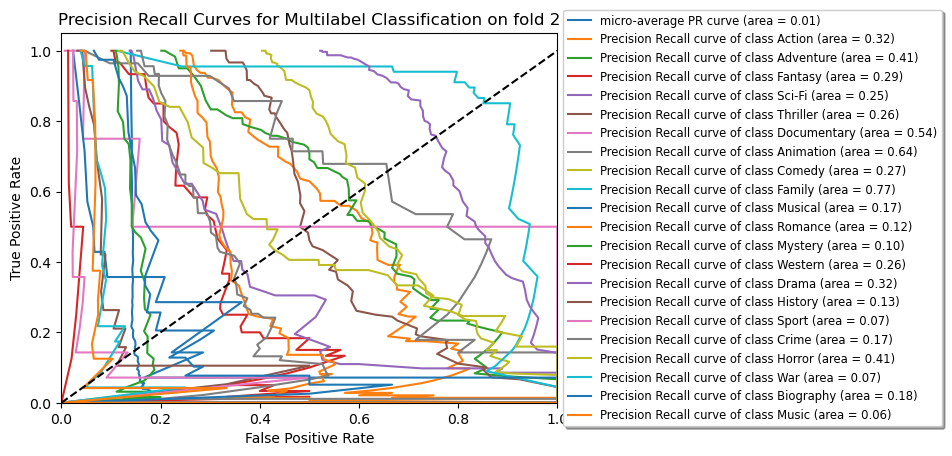

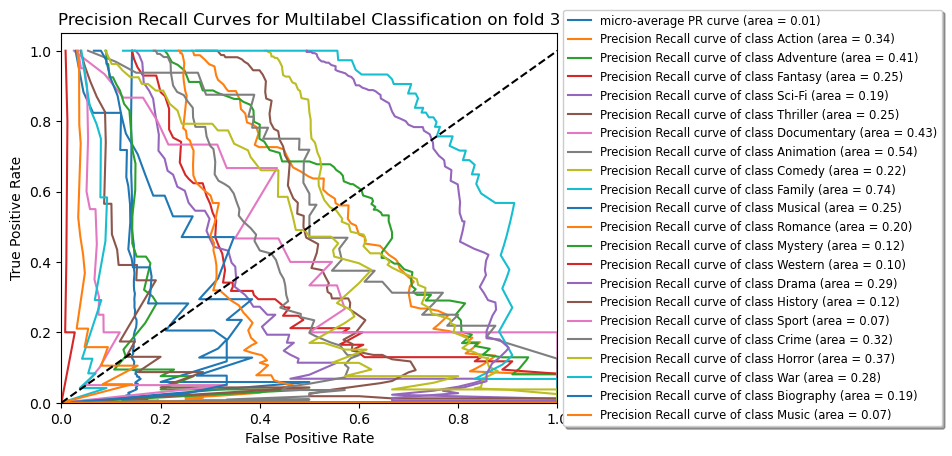

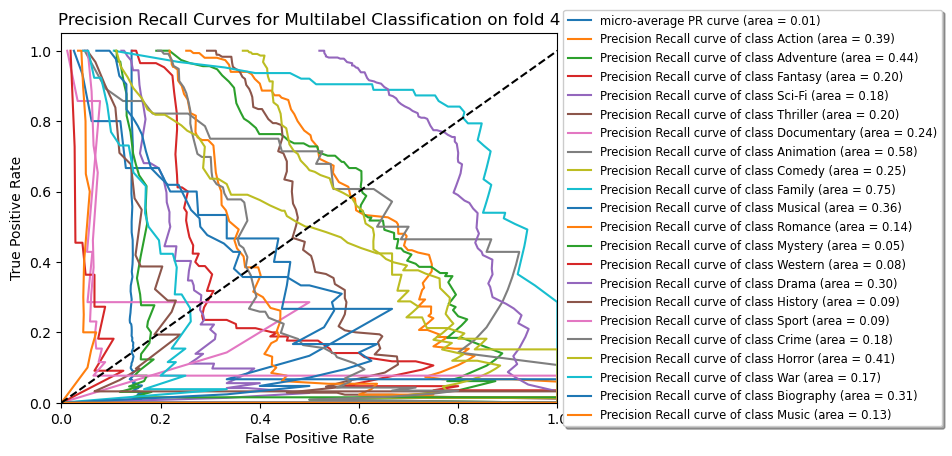

In [341]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = MinMaxScaler()
X_train_val = X_scaler.fit_transform(X_train_val)
y_train_val = y_train_val.to_numpy()
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=1)
fold_number = 0
for train_index, val_index in kf.split(X_train_val):
    base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
    multi_target_classifier.fit(X_train_val[train_index], y_train_val[train_index])
    y_pred = multi_target_classifier.predict_proba(X_train_val[val_index])
    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(y.shape[1]):
        precision[i], recall[i], _ = precision_recall_curve(y_train_val[val_index][:, i], y_pred[i][:, 1])
        sorted_indices = np.argsort(precision[i])
        recall_sorted = recall[i][sorted_indices]
        precision_sorted = precision[i][sorted_indices]
        pr_auc[i] = auc(precision_sorted, recall_sorted)
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_train_val[val_index].ravel(), 
                                                           np.array([y_pred[i][:, 1] for i in range(y.shape[1])]).ravel())
    sorted_indices = np.argsort(precision["micro"])
    recall_sorted = recall["micro"][sorted_indices]
    precision_sorted = precision["micro"][sorted_indices]
    pr_auc["micro"] = auc(precision_sorted, recall_sorted)
    # Plot all ROC curves
    plt.figure()
    plt.plot(precision["micro"], recall["micro"], label='micro-average PR curve (area = {0:0.2f})'.format(pr_auc["micro"]))
    
    for i in range(y.shape[1]):
        plt.plot(precision[i], recall[i], 
                 label='Precision Recall curve of class {0} (area = {1:0.2f})'.format(y_test.columns[i], pr_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Precision Recall Curves for Multilabel Classification on fold {fold_number}')
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', fancybox=True, shadow=True)
    plt.show()
    fold_number += 1